In [1]:
!pip install -Uqq fastai

     |████████████████████████████████| 194kB 16.6MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 


In [2]:
from fastai.vision.all import untar_data, URLs

In [3]:
path = untar_data(URLs.PASCAL_2007)

We are doing multi label classification that is in each prediction there is a possibility that the obejct doesn't exist or that the multiple objects exist.

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


Converting a dataframe to a dataloaders object. As seen in ch4 dataset is used for creatiing a zip of training data and labels, while a dataloader is used for creating mini batches. Datablock is a general purpose structure.

In [6]:
from fastai.vision.all import DataBlock

In [7]:
dblock = DataBlock()

In [8]:
# creating dataset from dblock

dsets = dblock.datasets(df)

In [9]:
len(dsets.train), len(dsets.valid)

(4009, 1002)

In [10]:
x, y = dsets.train[0]

In [11]:
x

fname         005550.jpg
labels      horse person
is_valid            True
Name: 2786, dtype: object

In [12]:
y

fname         005550.jpg
labels      horse person
is_valid            True
Name: 2786, dtype: object

In [13]:
x['fname']

'005550.jpg'

In [14]:
def get_x(r):
  return r['fname']

def get_y(r):
  return r['labels']

# we need to define how to extract the dataframe object out

dblock = DataBlock(get_x = get_x, get_y =get_y)
dsets = dblock.datasets(df)
dsets.train[0]

('000814.jpg', 'person')

In [15]:
# let give it complete path

def get_x(r):
  return path/'train'/r['fname']

def get_y(r):
  return r['labels'].split(' ')

dblock = DataBlock(get_x=get_x, get_y=get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(Path('/root/.fastai/data/pascal_2007/train/009189.jpg'), ['cow'])

Now we need to open the path then convertt the image into tensors, for which we need to use a set of transforms. 

actually in fastai there is a very easy way to do dat. blocktypes will help us. we can use the same block types that we have used previously. the imageblock will work fine again because we have a path that points to the valid image, but category blick wull not. The problem being that category block returns a single integer however we need to have multiple labels. so we use multicategoryblock.

In [16]:
from fastai.vision.all import ImageBlock, MultiCategoryBlock

In [17]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                    get_x=get_x, get_y=get_y)
dsets = dblock.datasets(df)
dsets.train[0]

# it shuffles data as well
# y is one hot encoded

(PILImage mode=RGB size=500x375,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
         0., 0.]))

In [18]:
dsets.train[0][1] # it is nothing but y

TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0.])

In [19]:
dsets.train[0][1] == 1.

TensorMultiCategory([False, False, False, False, False, False, False, False,  True, False,
         True, False, False, False, False,  True, False, False, False, False])

In [20]:
type(dsets.train[0][1] == 1.)

fastai.torch_core.TensorMultiCategory

In [21]:
from fastai.vision.all import torch

In [22]:
torch.where(dsets.train[0][1] == 1.)

(TensorMultiCategory([ 8, 10, 15]),)

In [23]:
idxs = torch.where(dsets.train[0][1] == 1.)[0]
dsets.train.vocab[idxs]

(#3) ['chair','diningtable','pottedplant']

In [24]:
dsets

(#5011) [(PILImage mode=RGB size=500x375, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=500x333, TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=500x375, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=500x333, TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=334x500, TensorMultiCategory([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=480x364, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=500x375, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 

In [25]:
dsets.train

(#4009) [(PILImage mode=RGB size=500x375, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=500x375, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 1.])),(PILImage mode=RGB size=500x333, TensorMultiCategory([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=480x392, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=500x281, TensorMultiCategory([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=500x333, TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=500x375, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
 

In [26]:
dsets.train.vocab

['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

In [27]:
idxs, list(idxs)

(TensorMultiCategory([ 8, 10, 15]), [tensor(8), tensor(10), tensor(15)])

In [28]:
# creating a validation set

def splitter(df):
  # it should spit out two lists
  train = df.index[~df['is_valid']].tolist()
  valid = df.index[df['is_valid']].tolist()
  return train, valid

# the choice of imageblock for x and ,multicategoryblock for y matters
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock), splitter = splitter, get_x=get_x, get_y=get_y)
dsets = dblock.datasets(df)
dsets.train

(#2501) [(PILImage mode=RGB size=500x333, TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=480x364, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=334x500, TensorMultiCategory([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=500x333, TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=500x281, TensorMultiCategory([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=500x366, TensorMultiCategory([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=360x500, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 

In [29]:
dsets.valid

(#2510) [(PILImage mode=RGB size=500x375, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=500x333, TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=500x375, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=334x500, TensorMultiCategory([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=500x375, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=375x500, TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])),(PILImage mode=RGB size=336x500, TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
 

In [30]:
from fastai.vision.all import RandomResizedCrop

In [31]:
# using dataloaders
# and random resized crop this is for pictures I guess

dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter = splitter,
                   get_x=get_x,
                   get_y=get_y,
                  item_tfms = RandomResizedCrop(128, min_scale=0.35))
dls = dblock.dataloaders(df)

In [32]:
dls.train # as soon as it becomes dataloaders dls.train is not accessible

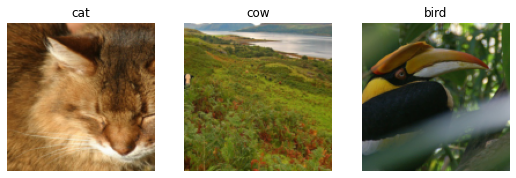

In [33]:
dls.show_batch(nrows=1, ncols=3)

In [34]:
dblock.summary(df)

Setting-up type transforms pipelines
0     000005.jpg           chair      True
1     000007.jpg             car      True
2     000009.jpg    horse person      True
3     000012.jpg             car     False
4     000016.jpg         bicycle      True
...          ...             ...       ...
5006  009954.jpg    horse person      True
5007  009955.jpg            boat      True
5008  009958.jpg  person bicycle      True
5009  009959.jpg             car     False
5010  009961.jpg             dog     False

[5011 rows x 3 columns]
Found 5011 items
2 datasets of sizes 2501,2510
Setting up Pipeline: get_x -> PILBase.create
Setting up Pipeline: get_y -> MultiCategorize -- {'vocab': None, 'sort': True, 'add_na': False} -> OneHotEncode -- {'c': None}

Building one sample
  Pipeline: get_x -> PILBase.create
    starting from
      fname       000012.jpg
labels             car
is_valid         False
Name: 3, dtype: object
    applying get_x gives
      /root/.fastai/data/pascal_2007/train/00001

Binary cross entropy as loss function.

In [35]:
from fastai.vision.all import cnn_learner
# can we use learner here



In [36]:
from fastai.vision.all import resnet18

In [37]:
# using learner
learn = cnn_learner(dls, resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [38]:
from fastai.vision.all import to_cpu

In [39]:
x,y = to_cpu(dls.train.one_batch())

In [40]:
activs = learn.model(x)

# learner is generally an object of a class inheriting from nn.Module
# we call it using parantheses and it will return the activations of the model
# we need to pass a mini batch thats whyu we used dls.train.one_batch()

In [41]:
x.shape # batch size is 64 and we have colored images that have size 128 * 128

(64, 3, 128, 128)

In [42]:
activs[0]

tensor([ 0.6840, -0.4702, -0.9345,  0.8806, -0.9272,  2.9666, -0.3512,  0.0262,
         0.3692, -2.1253, -1.8713, -2.5539, -0.8638, -1.4714,  0.2275,  1.4626,
         1.8561,  0.0498,  2.2859, -1.1554], grad_fn=<SelectBackward>)

In [43]:
# before using cross entropy we need to use sigmoid functionto bring it into 0 and 1
# need to refer to ch5 for this

def binary_cross_entropy(inputs, targets):
  inputs = inputs.sigmoid()
  return -torch.where(targets==1, inputs, 1-inputs).log().mean()

since we have one hot encoding therefore we cannot use nll_loss or softmax diretly

softmax as we saw requires that all predictions be sum to 1, and tends to push one activation to be much larger than the other ( due to ht euse of exp)

However in this case we have multiple objects that we are confident about so restricting the maximum sum of activations to 1 is not a good idea.

nll_loss returns the value of only one activation, single activation corresponding to the single label for an itme this doesn't make sense when we have multple items


binary_cross_entropy is mnist_loss with log


for one hot encoded tareds we use F.binary_cross_entropy, (BCEWithLogitsLoss),

for mnist F.null_loss (nn.NLLLoss),

 F.cross_entropy (n.CrossEntropyLoss) for version without inital softmax

 F.cross_entropy or nn.CrossEntropyLoss for version with initial softmax 

In [45]:
from fastai.vision.all import nn

In [46]:
loss_func = nn.BCEWithLogitsLoss()
loss = loss_func(activs, y)
loss

# fastai would by defaullt use this with MultiCategoryBlock

TensorMultiCategory(1.0682, grad_fn=<AliasBackward>)

In [47]:
# earlier accuract was through finding inp.argmax
# however in this case we need to definea threshold
# this is the threshold function
def accuracy_multi(inp, targ, thresh=0.5, sigmoid=True):
  if sigmoid: 
    inp = inp.sigmoid()
  return ((inp>thresh)==targ.bool()).float().mean()



In [48]:
# using partial function
def say_hello(name, say_what="Hello"):
  return f"{say_what} {name}."

say_hello('Jeremy')
say_hello('Jeremy', 'Ahoy!')

'Ahoy! Jeremy.'

In [50]:
from fastai.vision.all import partial

In [51]:
f = partial(say_hello, say_what="Bonjour")
f("Jeremy"), f("Sylvain")

('Bonjour Jeremy.', 'Bonjour Sylvain.')

In [55]:
from fastai.vision.all import resnet50

In [56]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.938222,0.699535,0.230558,00:30
1,0.821373,0.569661,0.285040,00:29
2,0.604092,0.197458,0.822570,00:30
3,0.361020,0.126217,0.940717,00:30


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.137287,0.120104,0.940080,00:31
1,0.120740,0.107186,0.953207,00:31
2,0.098949,0.102386,0.950737,00:31


In [57]:
learn.metrics = partial(accuracy_multi, thresh=0.1)
learn.validate()

(#2) [0.10238593071699142,0.9275099635124207]

In [58]:
preds, targs =learn.get_preds()



In [59]:
accuracy_multi(preds, targs, thresh=0.9, sigmoid=False)

# here we tell accuracy multi to not apply sigmoid=False
# since get_preds outs output directly

TensorMultiCategory(0.9568)

In [61]:
from fastai.vision.all import plt

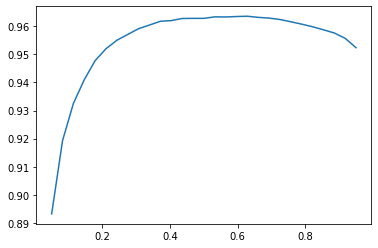

In [62]:
# looking at best threshold

xs = torch.linspace(0.05, 0.95, 29)
accs = [accuracy_multi(preds, targs, thresh=i, sigmoid=False) for i in xs]
plt.plot(xs, accs)

In [ ]:
# this mightlead to overfitting , 
# however since the graph is a smooth curve s we are not picking some outlier

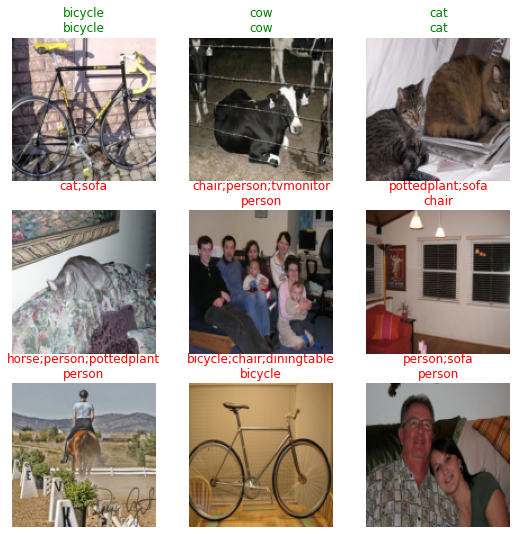

In [63]:
learn.show_results()